In [1]:
# importar librerías
import pandas as pd
import geopandas as gpd
import urbanaccess as ua
import pandana as pdna
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
gpd.options.use_pygeos = True
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
settings.to_dict()
feeds.to_dict()

{'data_folder': 'data',
 'logs_folder': 'logs',
 'log_file': True,
 'log_console': False,
 'log_name': 'urbanaccess',
 'log_filename': 'urbanaccess',
 'txt_encoding': 'utf-8',
 'gtfs_api': {'gtfsdataexch': 'http://www.gtfs-data-exchange.com/api/agencies?format=csv'}}

{'gtfs_feeds': {}}

In [3]:
feeds.add_feed(add_dict={'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip'})


Added 1 feeds to gtfs_feeds: {'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip'}


In [4]:
feeds.to_dict()

{'gtfs_feeds': {'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip'}}

In [5]:
gtfsfeeds.download()

data\gtfsfeed_zips does not exist. Directory was created
1 GTFS feed(s) will be downloaded here: data\gtfsfeed_zips
cercanias GTFS feed downloaded successfully. Took 5.81 seconds for 9,666,295.0KB
GTFS feed download completed. Took 5.81 seconds
data\gtfsfeed_text does not exist. Directory was created
cercanias.zip successfully extracted to: data\gtfsfeed_text\cercanias
GTFS feed zipfile extraction completed. Took 0.25 seconds for 1 files


In [6]:
#crear xarxa
validation = True
verbose = True
bbox = (-9.83,35.98,4.89,44.04)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
GTFS text file header whitespace check completed. Took 0.25 seconds
--------------------------------
Processing GTFS feed: cercanias
The unique agency id: renfe_cercanias was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.04 seconds
Unique GTFS feed id operation complete. Took 0.02 seconds
No GTFS feed stops were found to be outside the bounding box coordinates
cercanias GTFS feed stops: coordinates are in northwest hemisphere. Latitude = North (90); Longitude = West (-90).
cercanias GTFS feed stops: coordinates are in northeast hemisphere. Latitude = North (90); Longitude = East (90).
Appended route type to stops
Appended route type to stop_times
--------------------------------
Added descriptive definitions to stops, routes, stop_times, and trips tables
Successfully converted ['departure_time'] to seconds past midnight and 

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

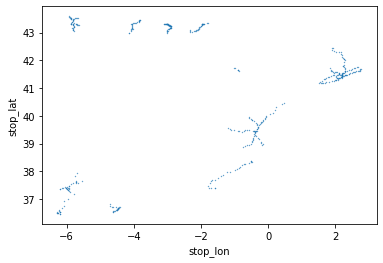

In [7]:
loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

In [8]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='tuesday',
                                   timerange=['00:00:00', '23:59:59'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
48 service_ids were extracted from calendar
14,057 trip(s) 14.47 percent of 97,135 total trip records were found in calendar for GTFS feed(s): ['cercanias']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
14,057 of 97,135 total trips were extracted representing calendar day: tuesday. Took 0.09 seconds
There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.
Difference between stop times has been successfully calculated. Took 0.00 seconds


ZeroDivisionError: division by zero